In [4]:
import numpy as np
import matplotlib.pyplot as plt


In [5]:

x_linear_separable = np.loadtxt('/Users/yajiewang/Downloads/cse353hw3/Data/X_LinearSeparable.txt', delimiter=',')
y_linear_separable = np.loadtxt('/Users/yajiewang/Downloads/cse353hw3/Data/Y_LinearSeparable.txt', delimiter=',')

In [6]:
print(x_linear_separable)
print(y_linear_separable)

[[1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   1.  ]
 [0.35 0.59 0.92 0.76 0.38 0.08 0.53 0.93 0.57 0.01 0.16 0.31 0.17 0.26
  0.69 0.45 0.23 0.15 0.54 0.08]
 [0.83 0.55 0.29 0.75 0.57 0.05 0.78 0.13 0.47 0.34 0.79 0.53 0.6  0.65
  0.75 0.08 0.91 0.83 1.   0.44]]
[-1.  1.  1.  1. -1.  1. -1.  1.  1. -1. -1. -1. -1. -1. -1.  1. -1. -1.
 -1. -1.]


In [7]:
#part 1
def signFunction (cur):
    if cur == 0:
        return 0
    elif cur > 0:
        return 1
    else:
        return -1

In [8]:


w = np.zeros(3)
t = 0;
while t < len(y_linear_separable):
    cur = np.zeros(3)
    cur[0] = x_linear_separable[0][t]
    cur[1] = x_linear_separable[1][t]
    cur[2] = x_linear_separable[2][t]
    if signFunction(np.dot(w.T, cur))  != y_linear_separable[t]:
        w = w + y_linear_separable[t]* cur
        t = -1
    t+=1 
    


0.0
1.0660919540229885


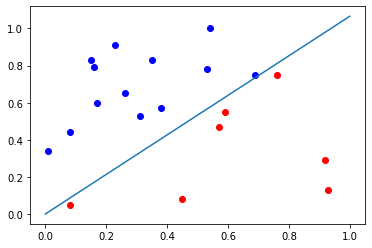

In [9]:

x1_one = []
x2_one = []

x1_neg_one = []
x2_neg_one = []

for t in range(len(y_linear_separable)):
    if y_linear_separable[t] == 1:
        x1_one.append(x_linear_separable[1][t])
        x2_one.append(x_linear_separable[2][t])
    else:
        x1_neg_one.append(x_linear_separable[1][t])
        x2_neg_one.append(x_linear_separable[2][t])

plt.scatter(x1_one, x2_one, color='red')
plt.scatter(x1_neg_one, x2_neg_one, color='blue')
x2_of_x1_equals_0 = w[0]/ ((-1) * w[2])
x2_of_x1_equals_1 = (w[0]+w[1])/((-1)*w[2])

print(x2_of_x1_equals_0)
print(x2_of_x1_equals_1)
x = [0,1]
y = [x2_of_x1_equals_0, x2_of_x1_equals_1]
plt.plot(x,y)
plt.show()

In [10]:
ct = 0
while t < len(y_linear_separable):
    cur = np.zeros(3)
    cur[0] = x_linear_separable[0][t]
    cur[1] = x_linear_separable[1][t]
    cur[2] = x_linear_separable[2][t]
    if signFunction(np.dot(w.T, cur))  != y_linear_separable[t]:
       ct+=1; 
    t+=1 

print("Error rate:", str(ct/len(y_linear_separable)))


Error rate: 0.0


In [16]:
# part2
x_nonlinear_separable = np.loadtxt('/Users/yajiewang/Downloads/cse353hw3/Data/X_NonLinearSeparable.txt', delimiter=',')
y_nonlinear_separable = np.loadtxt('/Users/yajiewang/Downloads/cse353hw3/Data/Y_NonLinearSeparable.txt', delimiter=',')

print(x_nonlinear_separable)
print(y_nonlinear_separable)


[[1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   1.  ]
 [0.35 0.59 0.92 0.76 0.38 0.08 0.53 0.93 0.57 0.01 0.16 0.31 0.17 0.26
  0.69 0.45 0.23 0.15 0.54 0.08]
 [0.83 0.55 0.29 0.75 0.57 0.05 0.78 0.13 0.47 0.34 0.79 0.53 0.6  0.65
  0.75 0.08 0.91 0.83 1.   0.44]]
[ 1. -1.  1.  1. -1.  1. -1.  1.  1. -1. -1. -1. -1. -1. -1.  1. -1. -1.
 -1. -1.]


In [17]:
pocket_w = np.zeros(3)
global_ct = len(y_nonlinear_separable)
w = np.zeros(3)


for iteration in range(1000):
    t = 0;
    while t < len(y_nonlinear_separable):
        cur = np.zeros(3)
        cur[0] = x_nonlinear_separable[0][t]
        cur[1] = x_nonlinear_separable[1][t]
        cur[2] = x_nonlinear_separable[2][t]
        if signFunction(np.dot(w.T, cur))  != y_nonlinear_separable[t]:
            w = w + y_nonlinear_separable[t]* cur
            j = 0
            ct = 0
            while j < len(y_nonlinear_separable):
                curr = np.zeros(3)
                curr[0] = x_nonlinear_separable[0][j]
                curr[1] = x_nonlinear_separable[1][j]
                curr[2] = x_nonlinear_separable[2][j]
                if signFunction(np.dot(w.T, curr))  != y_nonlinear_separable[j]:
                   ct+=1
                j+=1 
            if ct < global_ct:
                global_ct = ct
                pocket_w = w
                break
        t+=1 

0.0
0.9900000000000001
-0.9200000000000003
0.0
1.076086956521739


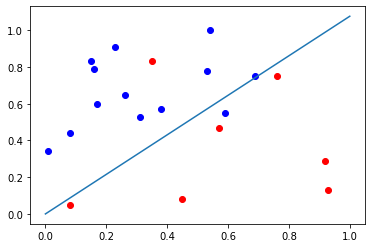

Error rate: 0.1
2


In [18]:
x1_one = []
x2_one = []

x1_neg_one = []
x2_neg_one = []

for t in range(len(y_nonlinear_separable)):
    if y_nonlinear_separable[t] == 1:
        x1_one.append(x_nonlinear_separable[1][t])
        x2_one.append(x_nonlinear_separable[2][t])
    else:
        x1_neg_one.append(x_nonlinear_separable[1][t])
        x2_neg_one.append(x_nonlinear_separable[2][t])

plt.scatter(x1_one, x2_one, color='red')
plt.scatter(x1_neg_one, x2_neg_one, color='blue')
x2_of_x1_equals_0 = pocket_w[0]/ ((-1) * pocket_w[2])
x2_of_x1_equals_1 = (pocket_w[0]+pocket_w[1])/((-1)*pocket_w[2])
print(pocket_w[0])
print(pocket_w[1])
print(pocket_w[2])
print(x2_of_x1_equals_0)
print(x2_of_x1_equals_1)
x = [0,1]
y = [x2_of_x1_equals_0, x2_of_x1_equals_1]
plt.plot(x,y)
plt.show()

print("Error rate:", str(global_ct/len(y_nonlinear_separable)))
print(global_ct)

In [13]:
# part3
x_handcrafted_training = np.loadtxt(r'/Users/gankowen/CSE 353/HW3/Data 2/X_Digits_HandcraftedFeature_Train.txt', delimiter = ',')
y_handcrafted_training = np.loadtxt(r'/Users/gankowen/CSE 353/HW3/Data 2/Y_Digits_HandcraftedFeature_Train.txt', delimiter = ',')

print(x_handcrafted_training)
print(y_handcrafted_training)


[[ 1.      1.      1.     ...  1.      1.      1.    ]
 [ 0.123   0.1139  0.1154 ...  0.368   0.3553  0.2329]
 [-0.7079 -0.9314 -0.386  ... -5.66   -4.6828 -4.4238]]
[ 1.  1.  1. ... -1. -1. -1.]


In [14]:
pocket_w = np.zeros(3)
global_ct = len(y_handcrafted_training)
w = np.zeros(3)


for iteration in range(1000):
    t = 0;
    while t < len(y_handcrafted_training):
        cur = np.zeros(3)
        cur[0] = x_handcrafted_training[0][t]
        cur[1] = x_handcrafted_training[1][t]
        cur[2] = x_handcrafted_training[2][t]
        if signFunction(np.dot(w.T, cur))  != y_handcrafted_training[t]:
            w = w + y_handcrafted_training[t]* cur
            j = 0
            ct = 0
            while j < len(y_handcrafted_training):
                curr = np.zeros(3)
                curr[0] = x_handcrafted_training[0][j]
                curr[1] = x_handcrafted_training[1][j]
                curr[2] = x_handcrafted_training[2][j]
                if signFunction(np.dot(w.T, curr))  != y_handcrafted_training[j]:
                   ct+=1
                j+=1 
            if ct < global_ct:
                global_ct = ct
                pocket_w = w
                break
        t+=1 

In [16]:
print(global_ct/len(y_handcrafted_training)) 
print(len(y_handcrafted_training))

0.0032030749519538757
1561


-2.483289530865199
-1.8423111147900415


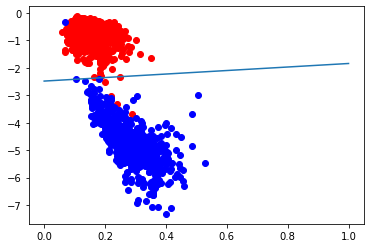

Error rate: 0.0032030749519538757


In [33]:
x1_one = []
x2_one = []

x1_neg_one = []
x2_neg_one = []

for t in range(len(y_handcrafted_training)):
    if y_handcrafted_training[t] == 1:
        x1_one.append(x_handcrafted_training[1][t])
        x2_one.append(x_handcrafted_training[2][t])
    else:
        x1_neg_one.append(x_handcrafted_training[1][t])
        x2_neg_one.append(x_handcrafted_training[2][t])

plt.scatter(x1_one, x2_one, color='red')
plt.scatter(x1_neg_one, x2_neg_one, color='blue')
x2_of_x1_equals_0 = pocket_w[0]/ ((-1) * pocket_w[2])
x2_of_x1_equals_1 = (pocket_w[0]+pocket_w[1])/((-1)*pocket_w[2])


x = [0,1]
y = [x2_of_x1_equals_0, x2_of_x1_equals_1]
plt.plot(x,y)
plt.show()

print("Error rate:", str(global_ct/len(y_handcrafted_training)))

In [34]:
x_handcrafted_testing = np.loadtxt(r'/Users/gankowen/CSE 353/HW3/Data 2/X_Digits_HandcraftedFeature_Test.txt', delimiter = ',')
y_handcrafted_testing = np.loadtxt(r'/Users/gankowen/CSE 353/HW3/Data 2/Y_Digits_HandcraftedFeature_Test.txt', delimiter = ',')


-2.483289530865199
-1.8423111147900415


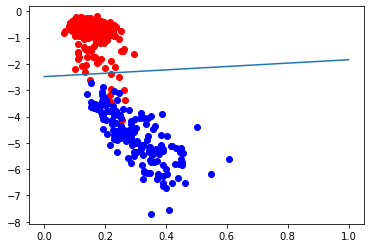

Error rate: 0.01179245283018868


In [35]:
x1_one = []
x2_one = []

x1_neg_one = []
x2_neg_one = []

for t in range(len(y_handcrafted_testing)):
    if y_handcrafted_testing[t] == 1:
        x1_one.append(x_handcrafted_testing[1][t])
        x2_one.append(x_handcrafted_testing[2][t])
    else:
        x1_neg_one.append(x_handcrafted_testing[1][t])
        x2_neg_one.append(x_handcrafted_testing[2][t])

plt.scatter(x1_one, x2_one, color='red')
plt.scatter(x1_neg_one, x2_neg_one, color='blue')
x2_of_x1_equals_0 = pocket_w[0]/ ((-1) * pocket_w[2])
x2_of_x1_equals_1 = (pocket_w[0]+pocket_w[1])/((-1)*pocket_w[2])


x = [0,1]
y = [x2_of_x1_equals_0, x2_of_x1_equals_1]
plt.plot(x,y)
plt.show()

print("Error rate:", str(global_ct/len(y_handcrafted_testing)))

In [3]:
#part4
x_rawFeature_training = np.loadtxt(r'/Users/gankowen/CSE 353/HW3/Data 2/X_Digits_RawFeature_Train.txt', delimiter = ',')
y_rawFeature_training = np.loadtxt(r'/Users/gankowen/CSE 353/HW3/Data 2/Y_Digits_RawFeature_Train.txt', delimiter = ',')

x_rawFeature_testing = np.loadtxt(r'/Users/gankowen/CSE 353/HW3/Data 2/X_Digits_RawFeature_Test.txt', delimiter = ',')
y_rawFeature_testing = np.loadtxt(r'/Users/gankowen/CSE 353/HW3/Data 2/Y_Digits_RawFeature_Test.txt', delimiter = ',')


In [17]:
pocket_w = np.zeros(len(x_rawFeature_training))
global_ct = len(y_rawFeature_training)
w = np.zeros(len(x_rawFeature_training))
#mylist = list(range(len(y_rawFeature_training)))

#for i in range(len(pocket_w)):
#    pocket_w[i] = 1

for iteration in range(100):
    t = 0;
    while t < len(y_rawFeature_training):
        cur = np.zeros(len(x_rawFeature_training))
        for i in range(len(x_rawFeature_training)):
            cur[i] = x_rawFeature_training[i][t]
        if signFunction(np.dot(w.T, cur))  != y_rawFeature_training[t]:
            w = w + y_rawFeature_training[t]* cur
            j = 0
            ct = 0
            while j < len(y_rawFeature_training):
                curr = np.zeros(len(x_rawFeature_training))
                for i in range(len(x_rawFeature_training)):
                    curr[i] = x_rawFeature_training[i][j]
                if signFunction(np.dot(w, curr))  != y_rawFeature_training[j]:
                   ct+=1
                j+=1 
            if ct < global_ct:
                global_ct = ct
                pocket_w = w
                #print(str(global_ct) + " at iteration " + str(iteration))
            break
        t+=1 
        
print(global_ct/len(y_rawFeature_training))

0.0


In [11]:

ct = 0
t = 0
while t < len(y_rawFeature_testing):
    cur = np.zeros(len(x_rawFeature_testing))
    for i in range(len(x_rawFeature_testing)):
        cur[i] = x_rawFeature_testing[i][t]
    if signFunction(np.dot(pocket_w.T, cur))  != y_rawFeature_testing[t]:
       ct+=1; 
    t+=1 
print(ct)
print("Error rate:", str(ct/len(y_rawFeature_testing)))


4
Error rate: 0.009433962264150943


0
